In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# import the useful datasets
df = pd.read_csv('data/adj_close_return.txt')
tickers = pd.read_csv('data/ticker.txt').values.flatten()
dates = pd.read_csv('data/date.txt').values.flatten()

print(f'Dataset from {dates[0]} to {dates[df.shape[0]]}')
print(f'Number of trading days = {df.shape[0]}')

Dataset from 2006-01-03 to 2009-12-31
Number of trading days = 1006


In [160]:
# 1 trading year = 252 trading days
T = 252
# from  row-index = s. We are selecting T rows
s = 70

if (T + s) <= df.shape[0]:
    # definition of dataset
    df_returns = df.iloc[s : s + T].reset_index().drop(columns='index')


    # definition of useful quantities
    N = df_returns.shape[1]
    D = T/N

    print(f'Analysis from {dates[s]} to {dates[s + T]}')
    print(f'Trading days = {T}')
    print(f'Number of stocks = {N}')
    print(f'D = T/N = {round(D,2)}')

Analysis from 2006-04-13 to 2007-04-17
Trading days = 252
Number of stocks = 227
D = T/N = 1.11


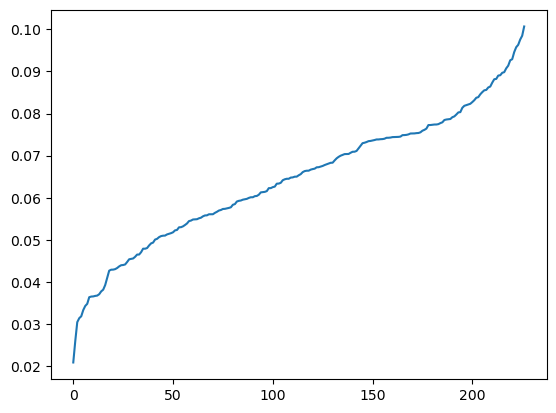

In [162]:
# Standardizing the data
scaler = StandardScaler()
df_returns_norm = pd.DataFrame(scaler.fit_transform(
    df_returns), columns=df_returns.columns)

# Perform PCA
pca = PCA()
pca.fit(df_returns_norm.values)

eigenvalues = pca.explained_variance_
eigenvectors = pca.components_
explained_variance = pca.explained_variance_ratio_

plt.plot(np.sort(eigenvectors[0]))
plt.show()

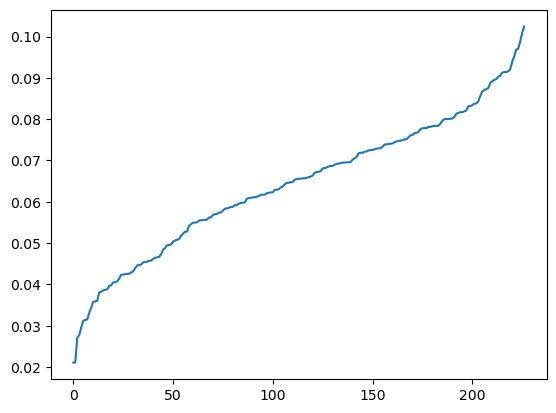

In [42]:
# Standardizing the data
scaler = StandardScaler()
df_returns_norm = pd.DataFrame(scaler.fit_transform(
    df_returns), columns=df_returns.columns)

# Perform PCA
pca = PCA()
pca.fit(df_returns_norm.values)

eigenvalues = pca.explained_variance_
eigenvectors = pca.components_
explained_variance = pca.explained_variance_ratio_

plt.plot(np.sort(eigenvectors[0]))
plt.show()

### Diagonalization of correlation matrix

In [43]:
corr_matrix = df_returns_norm.corr()

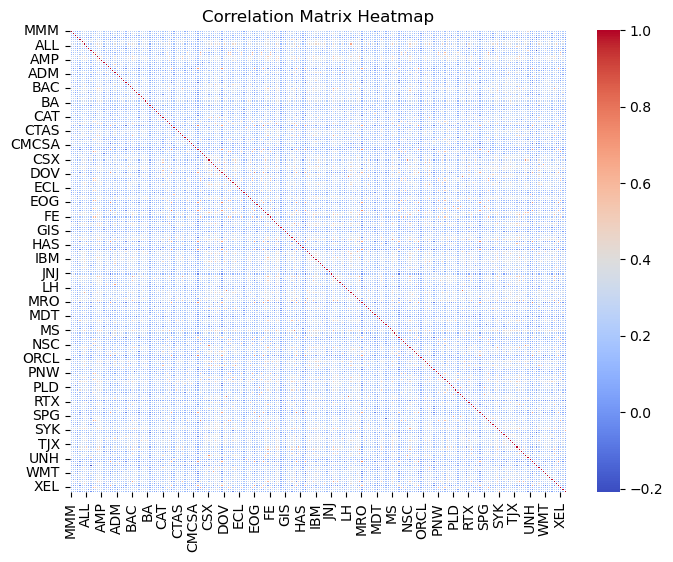

In [60]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

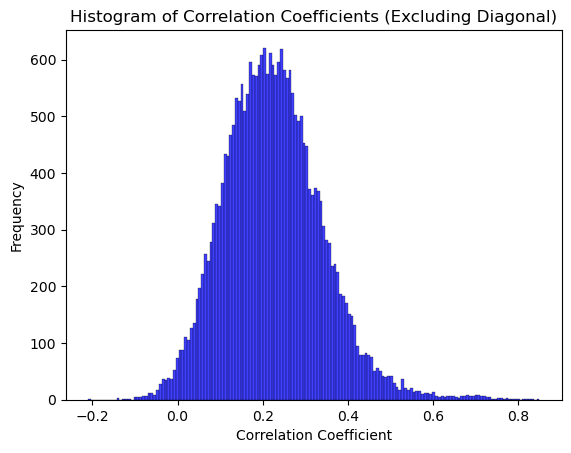

In [61]:
# Extract the upper triangle of the correlation matrix without the diagonal
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Flatten the matrix and drop NaN values
correlation_values = upper_triangle.stack().values

# Plot the histogram
#plt.figure(figsize=(8, 6))
sns.histplot(correlation_values, bins=int(np.sqrt(len(correlation_values))), kde=False, color='blue')
plt.title('Histogram of Correlation Coefficients (Excluding Diagonal)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.show()

In [62]:
# Excluding Diagonal values
max_corr = correlation_values.max()
min_corr = correlation_values.min()
mean_corr = correlation_values.mean()
std_corr = correlation_values.std()

print('max of the correlation matrix = ', max_corr)
print('min of the correlation matrix = ', min_corr)
print('mean of the correlation matrix = ', mean_corr)
print('std of the correlation matrix = ', std_corr)

max of the correlation matrix =  0.8493660020475589
min of the correlation matrix =  -0.20934553897090452
mean of the correlation matrix =  0.22483974000435106
std of the correlation matrix =  0.11555369849904981


In [84]:
# Calculate eigenvalues
eigenvalues_, eigenvectors_ = np.linalg.eigh(corr_matrix.values)

In [150]:
are_close = np.allclose(np.sort(eigenvalues), np.sort(eigenvalues_), atol=1e-0, rtol=0)
print(are_close)

True


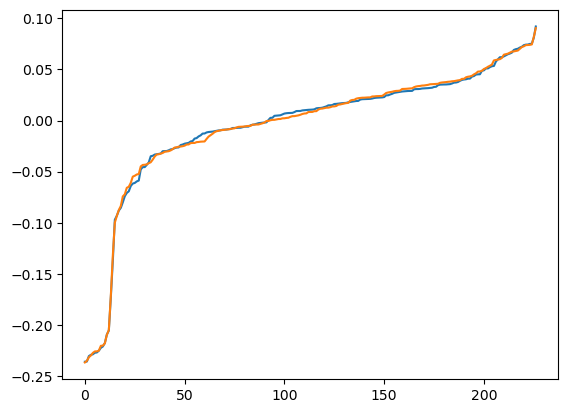

In [132]:
# consistency check between the eigenvectors calculated in the two ways
i = 2
plt.plot(np.sort(eigenvectors_[-i]))
plt.plot(np.sort(eigenvectors[i - 1]))
plt.show()